In [22]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np

In [23]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [24]:
SNR_array_3 = []
random_scale = 2800

In [25]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

10 11
wvfrm = 
l =  0  SNR =  7.7113609617595404  m1 =  10  m2 =  11
16 17
wvfrm = 
l =  1  SNR =  7.332390743630875  m1 =  16  m2 =  17
10 25
wvfrm = 
l =  2  SNR =  7.325705575943334  m1 =  10  m2 =  25
13 22
wvfrm = 
l =  3  SNR =  8.053474634218123  m1 =  13  m2 =  22
27 27
wvfrm = 
l =  4  SNR =  12.888766785725682  m1 =  27  m2 =  27
19 25
wvfrm = 
l =  5  SNR =  11.60087530630188  m1 =  19  m2 =  25
27 22
wvfrm = 
l =  6  SNR =  11.49362017030885  m1 =  27  m2 =  22
30 25
wvfrm = 
l =  7  SNR =  12.678550088171702  m1 =  30  m2 =  25
16 13
wvfrm = 
l =  8  SNR =  7.272045892239462  m1 =  16  m2 =  13
18 22
wvfrm = 
l =  9  SNR =  9.506807655482609  m1 =  18  m2 =  22
13 18
wvfrm = 
l =  10  SNR =  7.997638120261379  m1 =  13  m2 =  18
14 24
wvfrm = 
l =  11  SNR =  7.729053296741378  m1 =  14  m2 =  24
30 18
wvfrm = 
l =  12  SNR =  10.446077949812194  m1 =  30  m2 =  18
29 26
wvfrm = 
l =  13  SNR =  12.202137362496744  m1 =  29  m2 =  26
17 28
wvfrm = 
l =  14  SNR =  9.109917

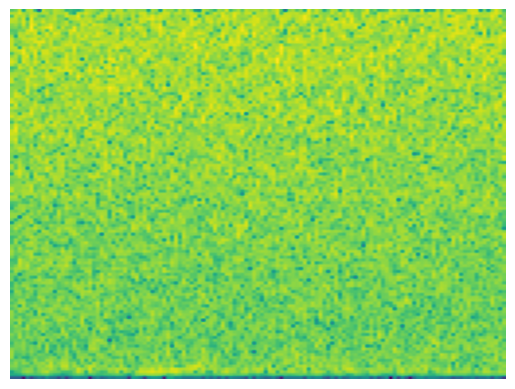

In [26]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 30
wvfrm = 
l =  100  SNR =  10.8116093563606  m1 =  19  m2 =  30
22 13
wvfrm = 
l =  101  SNR =  8.256721481184723  m1 =  22  m2 =  13
21 27
wvfrm = 
l =  102  SNR =  8.55148370986465  m1 =  21  m2 =  27
25 14
wvfrm = 
l =  103  SNR =  7.606677708879082  m1 =  25  m2 =  14
11 27
wvfrm = 
l =  104  SNR =  9.131253256504255  m1 =  11  m2 =  27
20 23
wvfrm = 
l =  105  SNR =  9.317106000122754  m1 =  20  m2 =  23
17 19
wvfrm = 
l =  106  SNR =  9.392014580077992  m1 =  17  m2 =  19
22 18
wvfrm = 
l =  107  SNR =  9.07865589379413  m1 =  22  m2 =  18
10 10
wvfrm = 
l =  108  SNR =  6.432420516857924  m1 =  10  m2 =  10
16 30
wvfrm = 
l =  109  SNR =  8.456007850102377  m1 =  16  m2 =  30
13 30
wvfrm = 
l =  110  SNR =  9.659816922036027  m1 =  13  m2 =  30
11 15
wvfrm = 
l =  111  SNR =  5.3583839158518645  m1 =  11  m2 =  15
18 26
wvfrm = 
l =  112  SNR =  9.66416419472394  m1 =  18  m2 =  26
30 20
wvfrm = 
l =  113  SNR =  9.735271479627903  m1 =  30  m2 =  20
29 27
wvfrm = 
l =  114

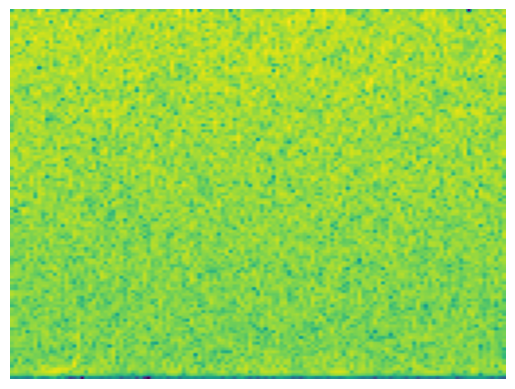

In [27]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 24
wvfrm = 
l =  200  SNR =  8.992815646325475  m1 =  10  m2 =  24
18 19
wvfrm = 
l =  201  SNR =  7.934082617860569  m1 =  18  m2 =  19
25 23
wvfrm = 
l =  202  SNR =  11.315188567322451  m1 =  25  m2 =  23
23 20
wvfrm = 
l =  203  SNR =  7.572243246191232  m1 =  23  m2 =  20
23 25
wvfrm = 
l =  204  SNR =  9.292916109351108  m1 =  23  m2 =  25
13 19
wvfrm = 
l =  205  SNR =  8.352154045240356  m1 =  13  m2 =  19
22 26
wvfrm = 
l =  206  SNR =  10.881289127575018  m1 =  22  m2 =  26
16 21
wvfrm = 
l =  207  SNR =  9.29526553950765  m1 =  16  m2 =  21
14 17
wvfrm = 
l =  208  SNR =  8.1312986940845  m1 =  14  m2 =  17
12 25
wvfrm = 
l =  209  SNR =  7.909352461937923  m1 =  12  m2 =  25
22 24
wvfrm = 
l =  210  SNR =  10.52881467338432  m1 =  22  m2 =  24
10 29
wvfrm = 
l =  211  SNR =  9.988418213390986  m1 =  10  m2 =  29
11 11
wvfrm = 
l =  212  SNR =  6.314912684873936  m1 =  11  m2 =  11
16 20
wvfrm = 
l =  213  SNR =  8.191511598308084  m1 =  16  m2 =  20
17 20
wvfrm = 
l =  2

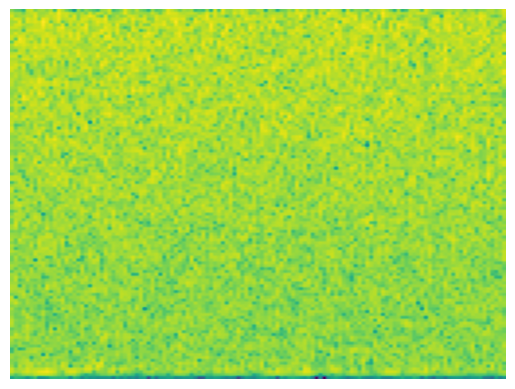

In [28]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 12
wvfrm = 
l =  300  SNR =  5.850599853659364  m1 =  13  m2 =  12
29 16
wvfrm = 
l =  301  SNR =  10.418000250716906  m1 =  29  m2 =  16
10 22
wvfrm = 
l =  302  SNR =  8.262516809455736  m1 =  10  m2 =  22
29 26
wvfrm = 
l =  303  SNR =  12.293213494440247  m1 =  29  m2 =  26
11 29
wvfrm = 
l =  304  SNR =  8.134953184536515  m1 =  11  m2 =  29
16 22
wvfrm = 
l =  305  SNR =  9.688356139526034  m1 =  16  m2 =  22
28 23
wvfrm = 
l =  306  SNR =  13.297970376242185  m1 =  28  m2 =  23
30 28
wvfrm = 
l =  307  SNR =  11.60825078852449  m1 =  30  m2 =  28
14 14
wvfrm = 
l =  308  SNR =  8.44400504546936  m1 =  14  m2 =  14
17 17
wvfrm = 
l =  309  SNR =  8.618277142045898  m1 =  17  m2 =  17
15 27
wvfrm = 
l =  310  SNR =  9.039794212065072  m1 =  15  m2 =  27
27 12
wvfrm = 
l =  311  SNR =  8.736370308108825  m1 =  27  m2 =  12
19 28
wvfrm = 
l =  312  SNR =  9.450613595707011  m1 =  19  m2 =  28
17 26
wvfrm = 
l =  313  SNR =  8.146501640056453  m1 =  17  m2 =  26
20 17
wvfrm = 
l =

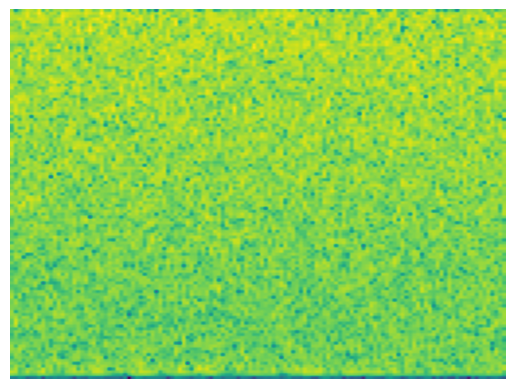

In [29]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 10
wvfrm = 
l =  400  SNR =  6.411206872968557  m1 =  26  m2 =  10
24 27
wvfrm = 
l =  401  SNR =  13.867109902194098  m1 =  24  m2 =  27
24 10
wvfrm = 
l =  402  SNR =  5.888056143618424  m1 =  24  m2 =  10
23 19
wvfrm = 
l =  403  SNR =  9.923563292345936  m1 =  23  m2 =  19
29 14
wvfrm = 
l =  404  SNR =  8.07824101659427  m1 =  29  m2 =  14
13 28
wvfrm = 
l =  405  SNR =  10.176651980720312  m1 =  13  m2 =  28
16 10
wvfrm = 
l =  406  SNR =  5.993434318917053  m1 =  16  m2 =  10
20 11
wvfrm = 
l =  407  SNR =  8.88214303940744  m1 =  20  m2 =  11
27 26
wvfrm = 
l =  408  SNR =  8.747905435470926  m1 =  27  m2 =  26
11 26
wvfrm = 
l =  409  SNR =  7.695800038837943  m1 =  11  m2 =  26
14 21
wvfrm = 
l =  410  SNR =  8.354855772925038  m1 =  14  m2 =  21
21 26
wvfrm = 
l =  411  SNR =  10.208264663361554  m1 =  21  m2 =  26
27 11
wvfrm = 
l =  412  SNR =  7.554122291027579  m1 =  27  m2 =  11
28 25
wvfrm = 
l =  413  SNR =  12.425985017035632  m1 =  28  m2 =  25
22 10
wvfrm = 
l =

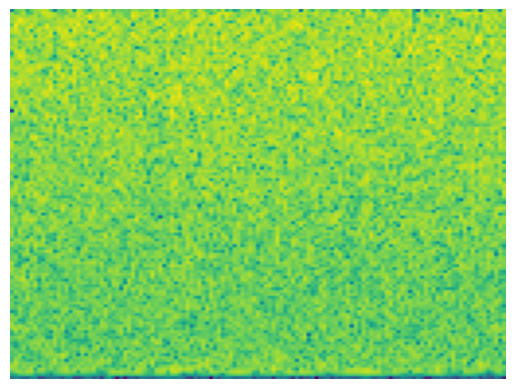

In [30]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [31]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

27 29
wvfrm = 
l =  500  SNR =  11.45367913449134  m1 =  27  m2 =  29
20 21
wvfrm = 
l =  501  SNR =  8.495344453631498  m1 =  20  m2 =  21
27 16
wvfrm = 
l =  502  SNR =  9.699491173522885  m1 =  27  m2 =  16
25 24
wvfrm = 
l =  503  SNR =  12.420968600580375  m1 =  25  m2 =  24
11 11
wvfrm = 
l =  504  SNR =  6.497333655612882  m1 =  11  m2 =  11
13 11
wvfrm = 
l =  505  SNR =  5.511622773513642  m1 =  13  m2 =  11
27 24
wvfrm = 
l =  506  SNR =  11.241264578515096  m1 =  27  m2 =  24
20 13
wvfrm = 
l =  507  SNR =  7.28819935644087  m1 =  20  m2 =  13
12 30
wvfrm = 
l =  508  SNR =  8.346213907359942  m1 =  12  m2 =  30
30 27
wvfrm = 
l =  509  SNR =  11.69670968916968  m1 =  30  m2 =  27
24 20
wvfrm = 
l =  510  SNR =  12.803595026069639  m1 =  24  m2 =  20
10 12
wvfrm = 
l =  511  SNR =  6.319377676968327  m1 =  10  m2 =  12
27 13
wvfrm = 
l =  512  SNR =  9.94946934065863  m1 =  27  m2 =  13
25 19
wvfrm = 
l =  513  SNR =  9.862004399321789  m1 =  25  m2 =  19
22 21
wvfrm = 
l = 

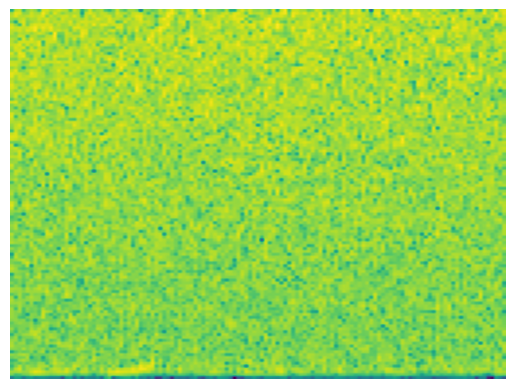

In [32]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 25
wvfrm = 
l =  600  SNR =  9.264650638971858  m1 =  24  m2 =  25
16 25
wvfrm = 
l =  601  SNR =  10.37770621439698  m1 =  16  m2 =  25
24 11
wvfrm = 
l =  602  SNR =  7.63007865922216  m1 =  24  m2 =  11
28 20
wvfrm = 
l =  603  SNR =  8.884776467027688  m1 =  28  m2 =  20
29 30
wvfrm = 
l =  604  SNR =  13.053160151134268  m1 =  29  m2 =  30
11 20
wvfrm = 
l =  605  SNR =  7.665431870391114  m1 =  11  m2 =  20
27 25
wvfrm = 
l =  606  SNR =  10.795613759092758  m1 =  27  m2 =  25
26 21
wvfrm = 
l =  607  SNR =  12.007093043140621  m1 =  26  m2 =  21
19 11
wvfrm = 
l =  608  SNR =  5.843471164392033  m1 =  19  m2 =  11
10 24
wvfrm = 
l =  609  SNR =  9.388114188017719  m1 =  10  m2 =  24
12 14
wvfrm = 
l =  610  SNR =  6.637089265373906  m1 =  12  m2 =  14
19 17
wvfrm = 
l =  611  SNR =  8.705986443602825  m1 =  19  m2 =  17
23 27
wvfrm = 
l =  612  SNR =  10.20275261785602  m1 =  23  m2 =  27
14 14
wvfrm = 
l =  613  SNR =  7.0446443426770164  m1 =  14  m2 =  14
18 22
wvfrm = 
l 

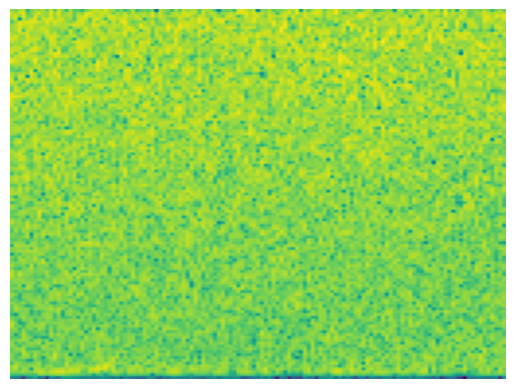

In [33]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 24
wvfrm = 
l =  700  SNR =  11.86466495910583  m1 =  29  m2 =  24
13 11
wvfrm = 
l =  701  SNR =  5.263809466619789  m1 =  13  m2 =  11
30 14
wvfrm = 
l =  702  SNR =  7.054915236260009  m1 =  30  m2 =  14
17 27
wvfrm = 
l =  703  SNR =  9.495478498872844  m1 =  17  m2 =  27
13 10
wvfrm = 
l =  704  SNR =  6.501921893742078  m1 =  13  m2 =  10
25 28
wvfrm = 
l =  705  SNR =  10.61827518447736  m1 =  25  m2 =  28
21 22
wvfrm = 
l =  706  SNR =  9.368102086102445  m1 =  21  m2 =  22
10 24
wvfrm = 
l =  707  SNR =  8.107251438408754  m1 =  10  m2 =  24
24 23
wvfrm = 
l =  708  SNR =  11.278258699811389  m1 =  24  m2 =  23
20 28
wvfrm = 
l =  709  SNR =  10.294154302845046  m1 =  20  m2 =  28
18 29
wvfrm = 
l =  710  SNR =  9.799482860051821  m1 =  18  m2 =  29
14 18
wvfrm = 
l =  711  SNR =  8.602943134662551  m1 =  14  m2 =  18
29 23
wvfrm = 
l =  712  SNR =  9.551251676768183  m1 =  29  m2 =  23
13 14
wvfrm = 
l =  713  SNR =  7.4351388870871045  m1 =  13  m2 =  14
30 22
wvfrm = 
l 

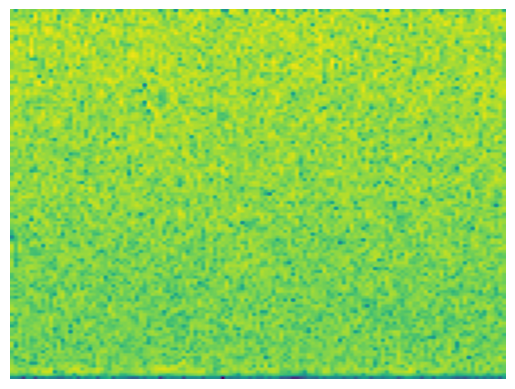

In [34]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 14
wvfrm = 
l =  800  SNR =  9.102050867312276  m1 =  18  m2 =  14
24 28
wvfrm = 
l =  801  SNR =  10.430644758482494  m1 =  24  m2 =  28
20 13
wvfrm = 
l =  802  SNR =  7.441879568840223  m1 =  20  m2 =  13
17 14
wvfrm = 
l =  803  SNR =  6.575252912158773  m1 =  17  m2 =  14
11 28
wvfrm = 
l =  804  SNR =  7.779535271364312  m1 =  11  m2 =  28
24 16
wvfrm = 
l =  805  SNR =  8.558102436571327  m1 =  24  m2 =  16
18 24
wvfrm = 
l =  806  SNR =  9.806126195836887  m1 =  18  m2 =  24
22 15
wvfrm = 
l =  807  SNR =  10.307294631575518  m1 =  22  m2 =  15
20 30
wvfrm = 
l =  808  SNR =  10.393489696565734  m1 =  20  m2 =  30
30 28
wvfrm = 
l =  809  SNR =  12.574009407207102  m1 =  30  m2 =  28
25 20
wvfrm = 
l =  810  SNR =  9.609928398108288  m1 =  25  m2 =  20
21 27
wvfrm = 
l =  811  SNR =  8.868295578385457  m1 =  21  m2 =  27
20 19
wvfrm = 
l =  812  SNR =  7.873413399592882  m1 =  20  m2 =  19
10 13
wvfrm = 
l =  813  SNR =  6.271768088093349  m1 =  10  m2 =  13
13 20
wvfrm = 
l

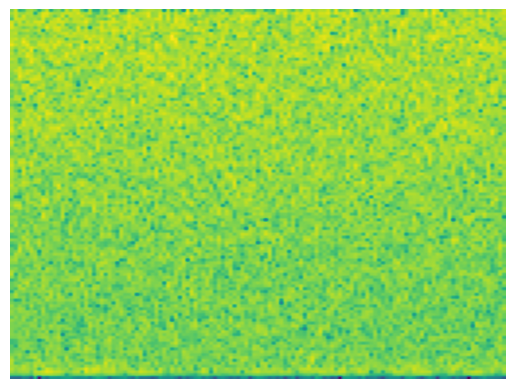

In [35]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 13
wvfrm = 
l =  900  SNR =  9.379541178618993  m1 =  15  m2 =  13
21 27
wvfrm = 
l =  901  SNR =  12.320208876656134  m1 =  21  m2 =  27
15 10
wvfrm = 
l =  902  SNR =  6.610375231945345  m1 =  15  m2 =  10
22 12
wvfrm = 
l =  903  SNR =  6.737947923983123  m1 =  22  m2 =  12
19 22
wvfrm = 
l =  904  SNR =  9.043692723529805  m1 =  19  m2 =  22
28 10
wvfrm = 
l =  905  SNR =  7.549525683090885  m1 =  28  m2 =  10
19 27
wvfrm = 
l =  906  SNR =  10.12902584036946  m1 =  19  m2 =  27
28 15
wvfrm = 
l =  907  SNR =  8.858521195750027  m1 =  28  m2 =  15
30 28
wvfrm = 
l =  908  SNR =  12.164966326057838  m1 =  30  m2 =  28
19 12
wvfrm = 
l =  909  SNR =  7.230307237464461  m1 =  19  m2 =  12
14 14
wvfrm = 
l =  910  SNR =  7.252115194481392  m1 =  14  m2 =  14
19 12
wvfrm = 
l =  911  SNR =  5.892033055672576  m1 =  19  m2 =  12
23 10
wvfrm = 
l =  912  SNR =  7.5143016224577295  m1 =  23  m2 =  10
11 23
wvfrm = 
l =  913  SNR =  7.623053286438078  m1 =  11  m2 =  23
29 22
wvfrm = 
l 

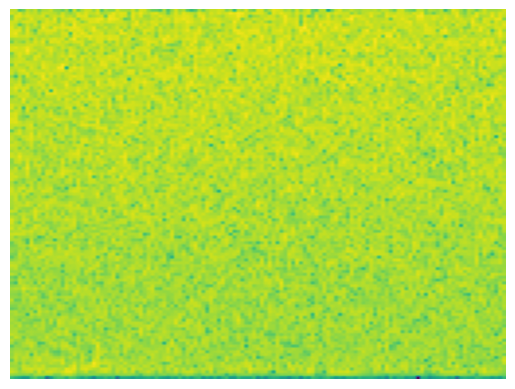

In [36]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 11
wvfrm = 
l =  1000  SNR =  5.877502534800692  m1 =  13  m2 =  11
13 26
wvfrm = 
l =  1001  SNR =  9.723586695384343  m1 =  13  m2 =  26
17 13
wvfrm = 
l =  1002  SNR =  6.941442796483644  m1 =  17  m2 =  13
15 12
wvfrm = 
l =  1003  SNR =  8.063573729091665  m1 =  15  m2 =  12
16 29
wvfrm = 
l =  1004  SNR =  10.378221445279172  m1 =  16  m2 =  29
23 19
wvfrm = 
l =  1005  SNR =  11.038783559922566  m1 =  23  m2 =  19
10 20
wvfrm = 
l =  1006  SNR =  7.050350389867958  m1 =  10  m2 =  20
15 25
wvfrm = 
l =  1007  SNR =  10.368410466941192  m1 =  15  m2 =  25
11 20
wvfrm = 
l =  1008  SNR =  6.230676536021009  m1 =  11  m2 =  20
28 25
wvfrm = 
l =  1009  SNR =  10.544265063447336  m1 =  28  m2 =  25
19 16
wvfrm = 
l =  1010  SNR =  9.37733462334231  m1 =  19  m2 =  16
29 10
wvfrm = 
l =  1011  SNR =  6.6783914664211315  m1 =  29  m2 =  10
10 21
wvfrm = 
l =  1012  SNR =  8.101804078365326  m1 =  10  m2 =  21
27 21
wvfrm = 
l =  1013  SNR =  10.690977796559205  m1 =  27  m2 =  21
1

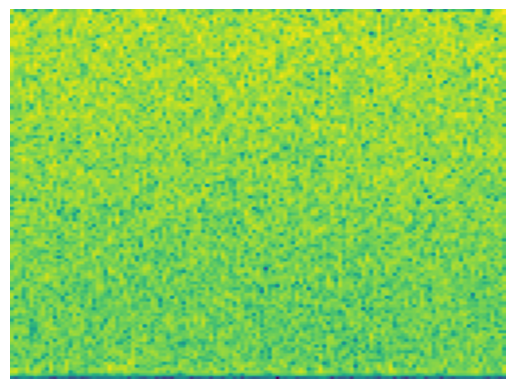

In [37]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 16
wvfrm = 
l =  1100  SNR =  7.345666162501294  m1 =  18  m2 =  16
26 25
wvfrm = 
l =  1101  SNR =  9.78304595968997  m1 =  26  m2 =  25
28 26
wvfrm = 
l =  1102  SNR =  10.961552448682395  m1 =  28  m2 =  26
16 14
wvfrm = 
l =  1103  SNR =  8.05705179918947  m1 =  16  m2 =  14
16 21
wvfrm = 
l =  1104  SNR =  7.337182006928526  m1 =  16  m2 =  21
23 24
wvfrm = 
l =  1105  SNR =  11.115074290163296  m1 =  23  m2 =  24
26 14
wvfrm = 
l =  1106  SNR =  8.814768518062548  m1 =  26  m2 =  14
13 11
wvfrm = 
l =  1107  SNR =  8.281923697399396  m1 =  13  m2 =  11
25 17
wvfrm = 
l =  1108  SNR =  9.959577470796486  m1 =  25  m2 =  17
12 27
wvfrm = 
l =  1109  SNR =  9.956765484461744  m1 =  12  m2 =  27
18 17
wvfrm = 
l =  1110  SNR =  7.796835109597044  m1 =  18  m2 =  17
28 15
wvfrm = 
l =  1111  SNR =  8.209701796722877  m1 =  28  m2 =  15
17 19
wvfrm = 
l =  1112  SNR =  6.578191201242311  m1 =  17  m2 =  19
15 24
wvfrm = 
l =  1113  SNR =  9.048298554413547  m1 =  15  m2 =  24
10 19


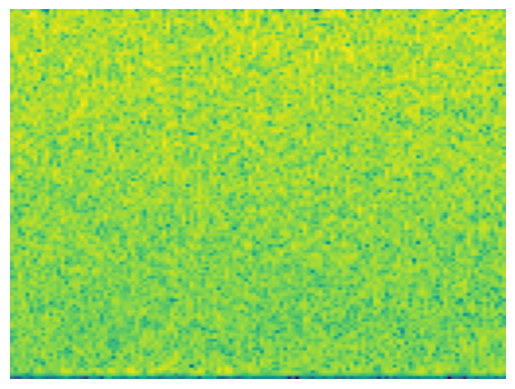

In [38]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 10
wvfrm = 
l =  1200  SNR =  7.688228581339726  m1 =  21  m2 =  10
30 24
wvfrm = 
l =  1201  SNR =  12.684930669868704  m1 =  30  m2 =  24
23 16
wvfrm = 
l =  1202  SNR =  8.234060305199632  m1 =  23  m2 =  16
24 29
wvfrm = 
l =  1203  SNR =  10.499484273923933  m1 =  24  m2 =  29
14 13
wvfrm = 
l =  1204  SNR =  8.46876090403978  m1 =  14  m2 =  13
14 11
wvfrm = 
l =  1205  SNR =  4.372477153254989  m1 =  14  m2 =  11
14 18
wvfrm = 
l =  1205  SNR =  7.563913999953667  m1 =  14  m2 =  18
29 16
wvfrm = 
l =  1206  SNR =  8.568282833012164  m1 =  29  m2 =  16
27 16
wvfrm = 
l =  1207  SNR =  11.02511808769233  m1 =  27  m2 =  16
30 14
wvfrm = 
l =  1208  SNR =  7.173408903101781  m1 =  30  m2 =  14
17 17
wvfrm = 
l =  1209  SNR =  8.101113547315872  m1 =  17  m2 =  17
28 15
wvfrm = 
l =  1210  SNR =  8.424188912511667  m1 =  28  m2 =  15
13 12
wvfrm = 
l =  1211  SNR =  6.047040343393144  m1 =  13  m2 =  12
23 20
wvfrm = 
l =  1212  SNR =  9.394104715681594  m1 =  23  m2 =  20
13 30

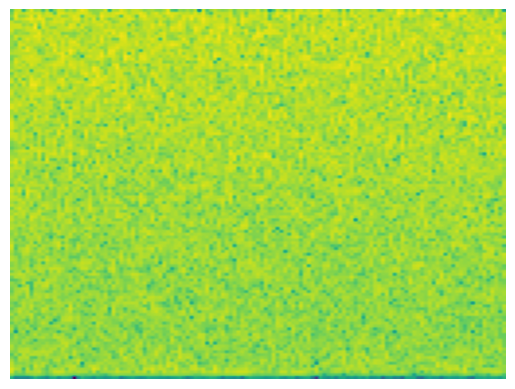

In [39]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

23 15
wvfrm = 
l =  1300  SNR =  9.884221445484968  m1 =  23  m2 =  15
30 25
wvfrm = 
l =  1301  SNR =  11.96576259135495  m1 =  30  m2 =  25
24 15
wvfrm = 
l =  1302  SNR =  8.320063782897757  m1 =  24  m2 =  15
29 20
wvfrm = 
l =  1303  SNR =  10.3826642128679  m1 =  29  m2 =  20
22 21
wvfrm = 
l =  1304  SNR =  11.220015889255535  m1 =  22  m2 =  21
14 30
wvfrm = 
l =  1305  SNR =  9.785225382957742  m1 =  14  m2 =  30
25 10
wvfrm = 
l =  1306  SNR =  7.719503392714441  m1 =  25  m2 =  10
12 25
wvfrm = 
l =  1307  SNR =  7.8531096143714185  m1 =  12  m2 =  25
10 23
wvfrm = 
l =  1308  SNR =  7.8237709368983195  m1 =  10  m2 =  23
28 12
wvfrm = 
l =  1309  SNR =  7.425173755109345  m1 =  28  m2 =  12
18 18
wvfrm = 
l =  1310  SNR =  7.325364883073131  m1 =  18  m2 =  18
24 10
wvfrm = 
l =  1311  SNR =  8.248093645740068  m1 =  24  m2 =  10
23 17
wvfrm = 
l =  1312  SNR =  8.81452615313893  m1 =  23  m2 =  17
10 30
wvfrm = 
l =  1313  SNR =  8.513260729619867  m1 =  10  m2 =  30
27 29

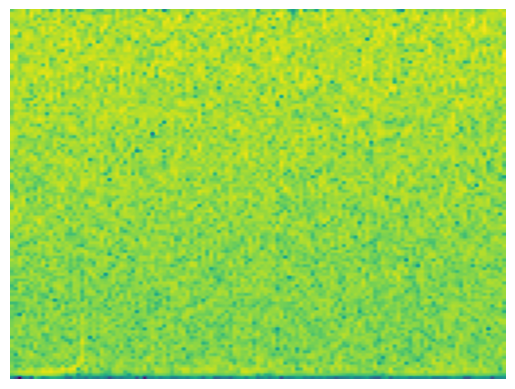

In [40]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 18
wvfrm = 
l =  1400  SNR =  8.348003353108842  m1 =  14  m2 =  18
24 18
wvfrm = 
l =  1401  SNR =  8.993027906439844  m1 =  24  m2 =  18
25 28
wvfrm = 
l =  1402  SNR =  11.493462046334455  m1 =  25  m2 =  28
29 18
wvfrm = 
l =  1403  SNR =  9.362290558559653  m1 =  29  m2 =  18
26 19
wvfrm = 
l =  1404  SNR =  9.3928107780224  m1 =  26  m2 =  19
22 20
wvfrm = 
l =  1405  SNR =  9.074063889109965  m1 =  22  m2 =  20
13 25
wvfrm = 
l =  1406  SNR =  9.175528388424887  m1 =  13  m2 =  25
25 25
wvfrm = 
l =  1407  SNR =  11.000667437997555  m1 =  25  m2 =  25
18 20
wvfrm = 
l =  1408  SNR =  9.52916500828797  m1 =  18  m2 =  20
29 19
wvfrm = 
l =  1409  SNR =  8.84495011646811  m1 =  29  m2 =  19
19 21
wvfrm = 
l =  1410  SNR =  9.5094934500613  m1 =  19  m2 =  21
30 27
wvfrm = 
l =  1411  SNR =  10.317763695247082  m1 =  30  m2 =  27
30 24
wvfrm = 
l =  1412  SNR =  11.54065952807252  m1 =  30  m2 =  24
18 26
wvfrm = 
l =  1413  SNR =  10.247616001036725  m1 =  18  m2 =  26
26 25
wv

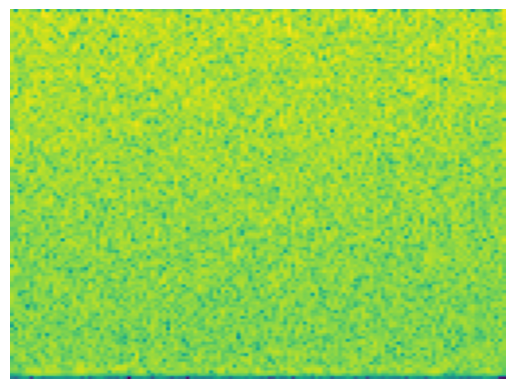

In [41]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 5000 + 6000 + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_3.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+6000+11000}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

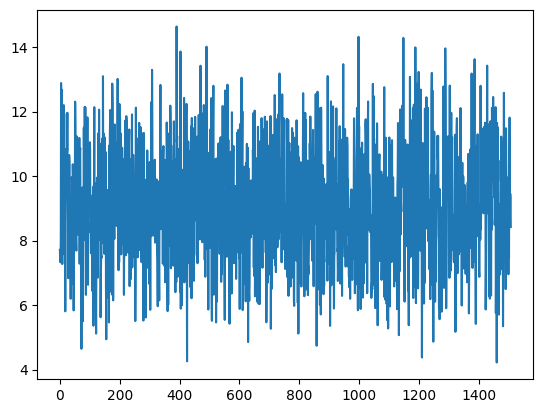

In [42]:
plt.plot(SNR_array_3)

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
